In [ ]:
import zipfile
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-05-01 11:48:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.2MB/s    in 3.2s    

2023-05-01 11:48:47 (32.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza -1 | head -n 10

1008104.jpg
1008144.jpg
1008844.jpg
1008941.jpg
1011404.jpg
102037.jpg
1026922.jpg
1029698.jpg
1033251.jpg
1035854.jpg


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
len(os.listdir("pizza_steak/train/steak"))

750

In [ ]:
import pathlib

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


Image shape: (512, 384, 3)


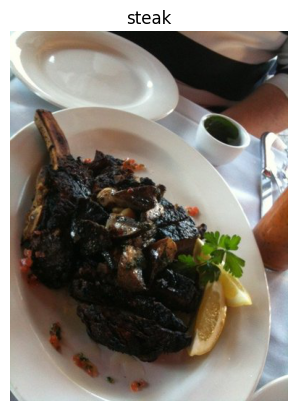

In [ ]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  
  random_image = random.sample(os.listdir(target_folder),1)
  
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

img = view_random_image(target_dir="pizza_steak/train/", target_class=class_names[-1])

In [ ]:
img.shape

(512, 384, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)
validation_data = validation_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
food_model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2), #(2,2)
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

food_model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
food_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
history_1 = food_model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=validation_data,
    validation_steps=len(validation_data))

Epoch 1/5
47/47 [==============================] - 25s 259ms/step - loss: 0.5714 - accuracy: 0.7067 - val_loss: 0.4260 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4330 - accuracy: 0.8067 - val_loss: 0.3621 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4006 - accuracy: 0.8287 - val_loss: 0.3814 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 11s 227ms/step - loss: 0.3636 - accuracy: 0.8393 - val_loss: 0.3249 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3220 - accuracy: 0.8673 - val_loss: 0.4078 - val_accuracy: 0.8100


Text(0.5, 0, 'epochs')

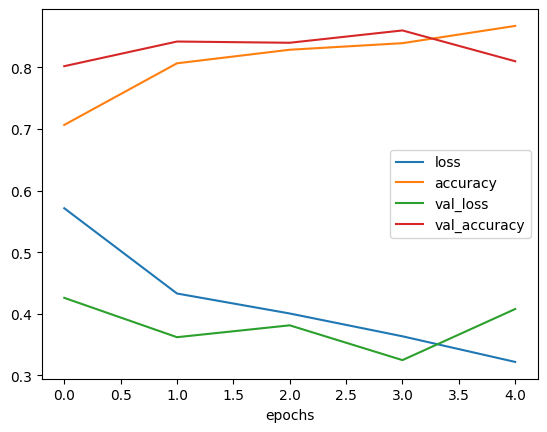

In [ ]:
food_hist_df = pd.DataFrame(history_1.history)
food_hist_df.plot()
plt.xlabel('epochs')

In [ ]:
food_model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10, 
        kernel_size=(3, 3), 
        strides=(1, 1), 
        padding='valid',
        activation='relu',
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

food_model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)
history_2 = food_model_2.fit(
    train_data, #train_data == X_train + y_train
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=validation_data,
    validation_steps=len(validation_data)
)

Epoch 1/5
47/47 [==============================] - 12s 229ms/step - loss: 0.5901 - accuracy: 0.6973 - val_loss: 0.4300 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3505 - accuracy: 0.8613 - val_loss: 0.3874 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.2293 - accuracy: 0.9347 - val_loss: 0.3768 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.1482 - accuracy: 0.9653 - val_loss: 0.3709 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 11s 228ms/step - loss: 0.0888 - accuracy: 0.9840 - val_loss: 0.4137 - val_accuracy: 0.8200


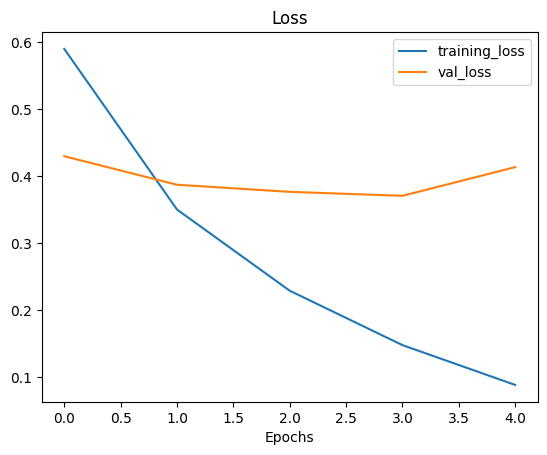

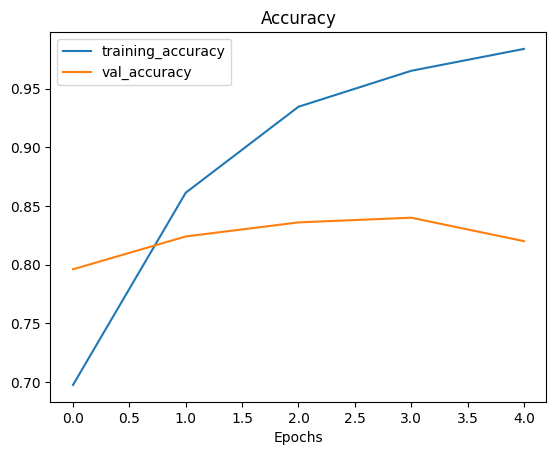

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(history_2)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

Fitting a machine learning model comes in 3 steps: 
0. Create a basline.

1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

In [ ]:
img, label = train_data[0]

In [ ]:
len(label) # train_data == 47BATCH * 32IMAGE-LABEL-PAIR

32

In [ ]:
food_model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

food_model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
history_3 = food_model_3.fit(
    train_data,
    steps_per_epoch=len(train_data),
    validation_data=validation_data,
    validation_steps=len(validation_data),
    epochs=5
)

Epoch 1/5
47/47 [==============================] - 14s 253ms/step - loss: 0.6304 - accuracy: 0.7147 - val_loss: 0.4860 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 12s 258ms/step - loss: 0.3981 - accuracy: 0.8353 - val_loss: 0.3726 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.2967 - accuracy: 0.8880 - val_loss: 0.4369 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 11s 230ms/step - loss: 0.1987 - accuracy: 0.9373 - val_loss: 0.4431 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.0861 - accuracy: 0.9753 - val_loss: 0.4347 - val_accuracy: 0.8320


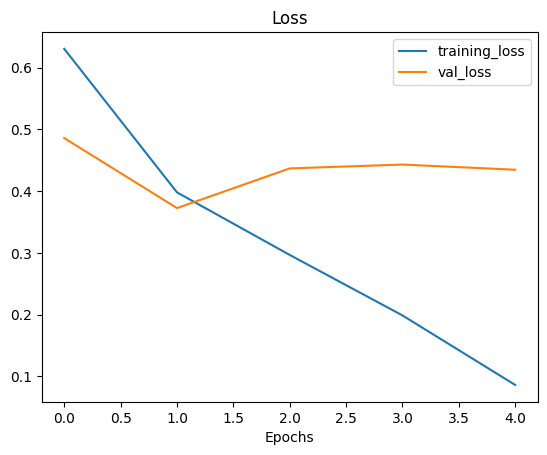

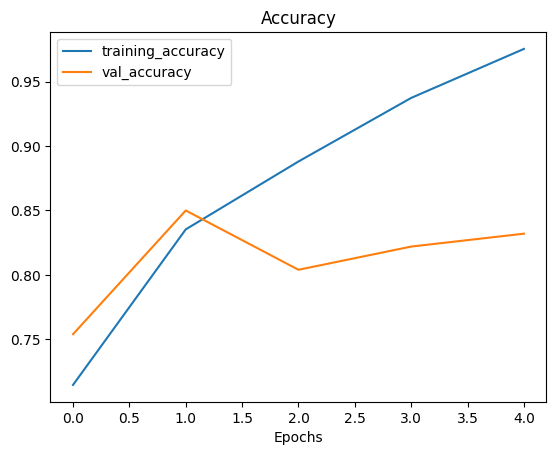

In [ ]:
plot_loss_curves(history_3)

In [ ]:
food_model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
food_model_4.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)
history_4 = food_model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=validation_data,
    validation_steps=len(validation_data)
)
food_hist_df = pd.DataFrame(history_4.history)
food_hist_df.plot()
plt.xlabel('epochs')

Epoch 1/5
47/47 [==============================] - 13s 239ms/step - loss: 0.6571 - accuracy: 0.6180 - val_loss: 0.5240 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 13s 288ms/step - loss: 0.4942 - accuracy: 0.7633 - val_loss: 0.4048 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 13s 288ms/step - loss: 0.4273 - accuracy: 0.8173 - val_loss: 0.4076 - val_accuracy: 0.8260
Epoch 4/5
19/47 [===========>..................] - ETA: 5s - loss: 0.3633 - accuracy: 0.8593

KeyboardInterrupt: ignored

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

In [ ]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)
# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = validation_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
food_model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
food_model_5.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)
history_5 = food_model_5.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=validation_data,
    validation_steps=len(validation_data)
)
food_hist_df = pd.DataFrame(history_5.history)
food_hist_df.plot()
plt.xlabel('epochs')

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

In [ ]:
food_model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
food_model_6.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)
history_6 = food_model_6.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=validation_data,
    validation_steps=len(validation_data)
)
food_hist_df = pd.DataFrame(history_6.history)
food_hist_df.plot()
plt.xlabel('epochs')